## Đồ án cuối kỳ - Lập trình cho Khoa học Dữ liệu

|Danh sách thành viên|MSSV|Phân chia công việc|Tiến độ hoàn thành|
|---|---|---|---|
|Đào Quốc Phong|18120505|||
|Hồ Hoàng Duy|19120207|||

## Thu thập dữ liệu

Dữ liệu trong đồ án lần này là về Phân tích Tính cách của Khách hàng (link [kaggle](https://www.kaggle.com/imakash3011/customer-personality-analysis)). Đây là một phân tích chi tiết về những khách hàng lý tưởng của một công ty. Nó giúp doanh nghiệp hiểu rõ hơn về khách hàng của mình và giúp họ dễ dàng sửa đổi sản phẩm theo nhu cầu, hành vi và mối quan tâm cụ thể của các loại khách hàng khác nhau.

Thông qua việc phân tích tính cách khách hàng giúp doanh nghiệp sửa đổi sản phẩm của mình dựa trên khách hàng mục tiêu từ các loại phân khúc khách hàng khác nhau. Ví dụ: thay vì chi tiền để tiếp thị một sản phẩm mới cho mọi khách hàng trong cơ sở dữ liệu của công ty, một công ty có thể phân tích phân khúc khách hàng nào có nhiều khả năng mua sản phẩm nhất và sau đó chỉ tiếp thị sản phẩm trên phân khúc cụ thể đó.

Data được cung cấp bởi Dr. Omar Romero-Hernandez. 

## Import các thư viện cơ bản

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Khám phá dữ liệu
### Đọc dữ liệu đầu vào

In [2]:
customer_df = pd.read_csv("marketing_campaign.csv", sep="\t")
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Bộ dữ liệu có bao nhiêu hàng và cột?

In [3]:
num_rows, num_cols = customer_df.shape
print('Dữ liệu có {} dòng và {} cột'.format(num_rows, num_cols))

Dữ liệu có 2240 dòng và 29 cột


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng là chi tiết thông tin của một khách hàng được thu thập. Có vẻ không có dòng nào có ý nghĩa khác.

### Dữ liệu có dòng nào bị trùng không?

In [4]:
duplicated_rows = customer_df.duplicated()
num_duplicated_rows = len(customer_df[duplicated_rows])
print("Có {} dòng bị lặp.".format(num_duplicated_rows))

Có 0 dòng bị lặp.


### Mỗi cột có ý nghĩa gì?

Dưới đây là mô tả ý nghĩa của các cột trong file `marketing_campaign.csv`:   

*People*

ID: Customer's unique identifier ID khách hàng (duy nhất)  
Year_Birth: Customer's birth year (Năm sinh của khách hàng)  
Education: Customer's education level (Trình độ học vấn của khách hàng)  
Marital_Status: Customer's marital status (Tình trạng hôn nhân của khách hàng)  
Income: Customer's yearly household income (Thu nhập hộ gia đình của khách hàng)  
Kidhome: Number of children in customer's household (Số lượng trẻ con trong gia đình)  
Teenhome: Number of teenagers in customer's household (Số lượng trẻ thành niên trong gia đình)  
Dt_Customer: Date of customer's enrollment with the company (Ngày KH đăng ký thành viên)  
Recency: Number of days since customer's last purchase (Số ngày kể từ lần mua hàng gần nhất)  
Complain: 1 if the customer complained in the last 2 years, 0 otherwise (1 nếu có phàn nàn trong vòng 2 năm gần đây, 0 nếu ngược lại)  

*Products*

MntWines: Amount spent on wine in last 2 years (Số tiền chi cho rượu trong vòng 2 năm gần đây)  
MntFruits: Amount spent on fruits in last 2 years (Số tiền chi cho trái cây trong vòng 2 năm gần đây)  
MntMeatProducts: Amount spent on meat in last 2 years (Số tiền chi cho thịt trong vòng 2 năm gần đây)  
MntFishProducts: Amount spent on fish in last 2 years (Số tiền chi cho cá trong vòng 2 năm gần đây)  
MntSweetProducts: Amount spent on sweets in last 2 years (Số tiền chi cho đồ ngọt trong vòng 2 năm gần đây)  
MntGoldProds: Amount spent on gold in last 2 years (Số tiền chi cho vàng trong vòng 2 năm gần đây)  

*Promotion*

NumDealsPurchases: Number of purchases made with a discount (Số lần mua hàng có giảm giá)  
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise  

*Place*

NumWebPurchases: Number of purchases made through the company’s website (Số lần mua hàng qua website công ty)  
NumCatalogPurchases: Number of purchases made using a catalogue (Số lần mua hàng bằng catalogue)  
NumStorePurchases: Number of purchases made directly in stores (Số lần mua hàng trực tiếp ở cửa hàng)  
NumWebVisitsMonth: Number of visits to company’s website in the last month (Số lần truy cập website công ty trong tháng trước)  

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào cần thay đổi kiểu dữ liệu không?

In [5]:
col_dtypes = customer_df.dtypes
col_dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Ta thấy có 3 cột có kiểu dữ liệu là `object` là: `Education`, `Marital_Status`, `Dt_Customer`. Quan sát vài bộ dữ liệu thì ta có thể đoán cột `Education` và `Marital_Status` có kiểu dữ liệu `str` và thuộc dạng categorical, cột `Dt_Customer` có dạng "Ngày tháng năm". Các cột còn lại có dạng numerical

Để khẳng định 3 cột có kiểu `object` có kiểu dữ liệu là `str` ta viết hàm `open_object_dtype` (tương tự `HW3`):

In [6]:
def open_object_dtype(s):
    dtypes = set()
    for i in s:
        dtypes.add(type(i))
    return dtypes

In [7]:
#TEST
assert open_object_dtype(customer_df['Education']) == {str}
assert open_object_dtype(customer_df['Marital_Status']) == {str}
assert open_object_dtype(customer_df['Dt_Customer']) == {str}

Cột `Dt_Customer` đang biểu diễn dạng `Datetime` nên ta cần chuyển cột này từ `str` về `datetime`

## Tiền xử lý

Ta nhận thấy 2 cột `Z_CostContact` và `Z_Revenue` đều có độ lệch chuẩn = 0 và mỗi cột chỉ có duy nhất 1 giá trị nên ta có thể tiến hành bỏ đi 2 cột này

In [8]:
customer_df.drop('Z_CostContact',axis=1,inplace=True)
customer_df.drop('Z_Revenue',axis=1,inplace=True)
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


Trong bảng dữ liệu này có khá nhiều các cột gần tương tự nhau, ta có thể tạo một cột mới để gộp tổng các giá trị các cột này rồi sẽ bỏ các cột đó đi để bảng dữ liệu trở nên gọn hơn.   

Đầu tiên ta sẽ nội suy cột năm sinh `Year_Birth` thành cột tuổi `Age` để dễ dàng trong việc kết luận.

In [9]:
customer_df['Age'] = 2021 - customer_df['Year_Birth']

### Cột `Education`:

In [10]:
customer_df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Để đơn giản, ta sẽ chuẩn hóa cột `Education` về chỉ còn 2 giá trị `PostGrad` và `UnderGrad` tương ứng với đã tốt nghiệp Đại học và chưa tốt nghiệp Đại học.

In [11]:
customer_df['Education'] = customer_df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'], 'PostGrad')  
customer_df['Education'] = customer_df['Education'].replace(['Basic'], 'UnderGrad')

### Cột `Marital_Status`:

In [12]:
customer_df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Ta cũng sẽ chuyển hóa cột này về chỉ còn 2 giá trị: `InRelationship` (gồm `Married` và `Together`) và `Single` (gồm `Single` (trong bảng dữ liệu cũ), `Divorced`, `Widow`, `Alone`, `Absurd`, `YOLO`)

In [13]:
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace(['Married', 'Together'], 'InRelationship')
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

In [14]:
customer_df['Marital_Status'].value_counts()

InRelationship    1444
Single             796
Name: Marital_Status, dtype: int64

### Các cột khác

In [15]:
# Kidhome + Teenhome = Kids
customer_df['Kids'] = customer_df['Kidhome'] + customer_df['Teenhome']
# MntWines + MntFriuts + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds = Expenses
customer_df['Expenses'] = customer_df['MntWines'] + customer_df['MntFruits'] + customer_df['MntMeatProducts'] + customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds']
# AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response = TotalAcceptedCmp
customer_df['TotalAcceptedCmp'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5'] + customer_df['Response']
# NumWebPurchases + NumCatalogPurchases + NumStorePurchases + NumDealsPurchases = NumTotalPurchases
customer_df['NumTotalPurchases'] = customer_df['NumWebPurchases'] + customer_df['NumCatalogPurchases'] + customer_df['NumStorePurchases'] + customer_df['NumDealsPurchases']

### Xóa các cột để giảm số chiều của dữ liệu

In [16]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4", "AcceptedCmp5", "Response", 
           "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases", 
           "Kidhome", "Teenhome"]
customer_df = customer_df.drop(columns=col_del,axis=1)
customer_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,PostGrad,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,7,0,64,0,1617,1,25
1,2174,1954,PostGrad,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,5,0,67,2,27,0,6
2,4141,1965,PostGrad,InRelationship,71613.0,21-08-2013,26,426,49,127,111,21,42,4,0,56,0,776,0,21
3,6182,1984,PostGrad,InRelationship,26646.0,10-02-2014,26,11,4,20,10,3,5,6,0,37,1,53,0,8
4,5324,1981,PostGrad,InRelationship,58293.0,19-01-2014,94,173,43,118,46,27,15,5,0,40,1,422,0,19
5,7446,1967,PostGrad,InRelationship,62513.0,09-09-2013,16,520,42,98,0,42,14,6,0,54,1,716,0,22
6,965,1971,PostGrad,Single,55635.0,13-11-2012,34,235,65,164,50,49,27,6,0,50,1,590,0,21
7,6177,1985,PostGrad,InRelationship,33454.0,08-05-2013,32,76,10,56,3,1,23,8,0,36,1,169,0,10
8,4855,1974,PostGrad,InRelationship,30351.0,06-06-2013,19,14,0,24,3,3,2,9,0,47,1,46,1,6
9,5899,1950,PostGrad,InRelationship,5648.0,13-03-2014,68,28,0,6,1,1,13,20,0,71,2,49,1,2


Chuyển `dtype` của cột `Dt_Customer` sang kiểu dữ liệu thời gian:

In [17]:
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], format='%d-%m-%Y')

In [18]:
# TEST 
# Nếu dtype của cột "Date" đã được chuyển sang datetime thì phải dùng được .dt.
assert customer_df['Dt_Customer'].dt.year.min() == 2012

## Khám phá dữ liệu (tiếp tục)

Ta thấy cột `Income` là cột duy nhất có giá trị thiếu.

In [19]:
num_of_missing_income = customer_df['Income'].isnull().sum()
print(f'Có {num_of_missing_income} dòng có giá trị thiếu')

Có 24 dòng có giá trị thiếu


Do tỷ lệ mẫu thiếu khá nhỏ so với tổng thể nên trong đồ án này, nhóm sẽ tiến hành bỏ các dòng thiếu thông tin cột `Income` đi.

In [26]:
customer_df = customer_df.dropna(axis=0)
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,PostGrad,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,7,0,64,0,1617,1,25
1,2174,1954,PostGrad,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,5,0,67,2,27,0,6
2,4141,1965,PostGrad,InRelationship,71613.0,2013-08-21,26,426,49,127,111,21,42,4,0,56,0,776,0,21
3,6182,1984,PostGrad,InRelationship,26646.0,2014-02-10,26,11,4,20,10,3,5,6,0,37,1,53,0,8
4,5324,1981,PostGrad,InRelationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,0,40,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,PostGrad,InRelationship,61223.0,2013-06-13,46,709,43,182,42,118,247,5,0,54,1,1341,0,18
2236,4001,1946,PostGrad,InRelationship,64014.0,2014-06-10,56,406,0,30,0,0,8,7,0,75,3,444,1,22
2237,7270,1981,PostGrad,Single,56981.0,2014-01-25,91,908,48,217,32,12,24,6,0,40,0,1241,1,19
2238,8235,1956,PostGrad,InRelationship,69245.0,2014-01-24,8,428,30,214,80,30,61,3,0,65,1,843,0,23


### Xử lý ngoại lai (outlier)

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


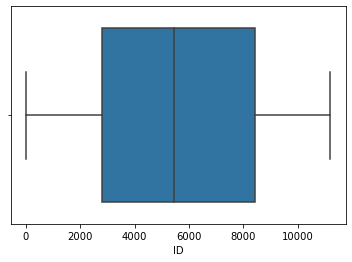

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


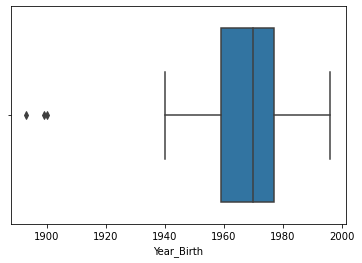

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


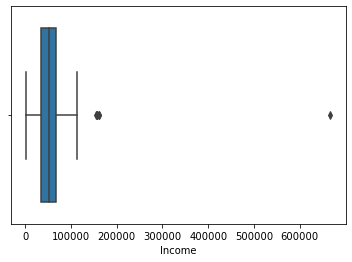

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


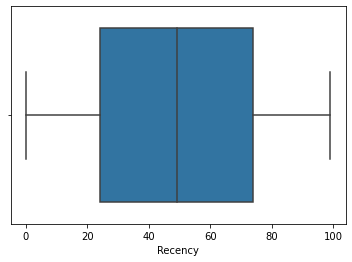

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


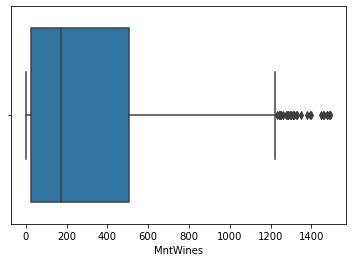

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


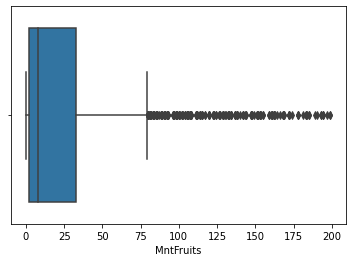

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


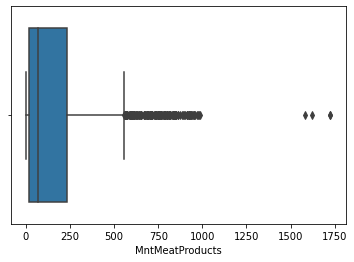

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


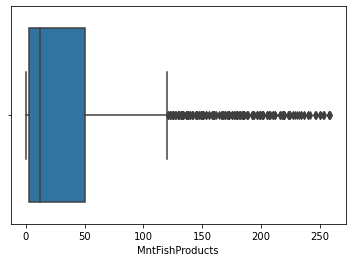

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


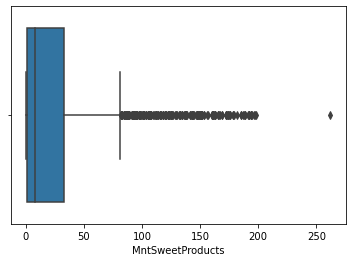

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


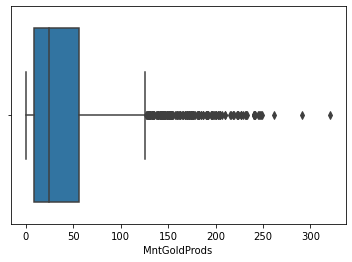

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


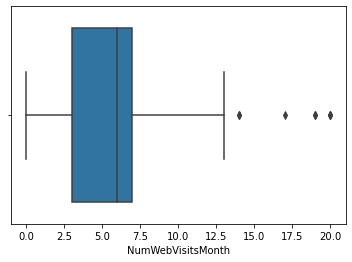

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


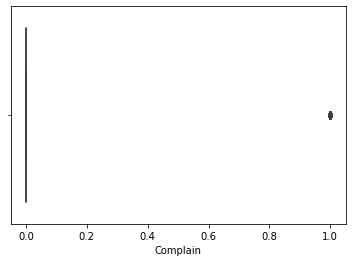

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


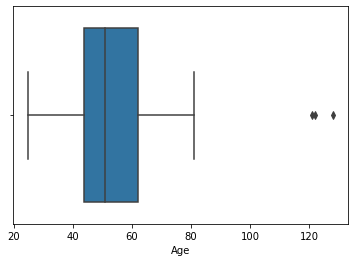

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


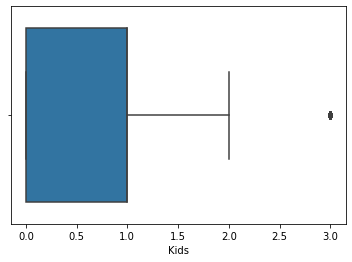

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


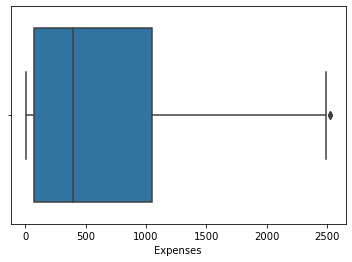

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


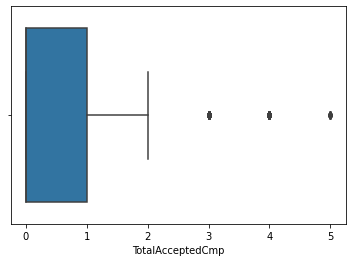

/home/hhduy/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


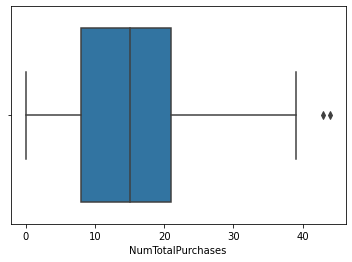

In [21]:
def detect_outliers(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            sns.boxplot(frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.boxplot(frame[i])
            plt.show()
            
detect_outliers(customer_df)

Cột `Income` có giá trị lớn nhất là 666000, đây là thu nhập vượt quá ngưỡng outlier theo IQR nên ta sẽ bỏ dòng chứa có giá trị từ 600000 trở lên.

In [27]:
customer_df = customer_df[customer_df['Income'] < 600000.0]
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,PostGrad,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,7,0,64,0,1617,1,25
1,2174,1954,PostGrad,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,5,0,67,2,27,0,6
2,4141,1965,PostGrad,InRelationship,71613.0,2013-08-21,26,426,49,127,111,21,42,4,0,56,0,776,0,21
3,6182,1984,PostGrad,InRelationship,26646.0,2014-02-10,26,11,4,20,10,3,5,6,0,37,1,53,0,8
4,5324,1981,PostGrad,InRelationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,0,40,1,422,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,PostGrad,InRelationship,61223.0,2013-06-13,46,709,43,182,42,118,247,5,0,54,1,1341,0,18
2236,4001,1946,PostGrad,InRelationship,64014.0,2014-06-10,56,406,0,30,0,0,8,7,0,75,3,444,1,22
2237,7270,1981,PostGrad,Single,56981.0,2014-01-25,91,908,48,217,32,12,24,6,0,40,0,1241,1,19
2238,8235,1956,PostGrad,InRelationship,69245.0,2014-01-24,8,428,30,214,80,30,61,3,0,65,1,843,0,23


Ta tìm tỷ lệ phân bố các cột numeric: dựa vào giá trị các cột có kiểu dữ liệu `int64` hoặc `float64` ta có thể nhận ra các cột thực chất là numeric gồm: `Age`, `Income`, `Kids`, `Dt_Customer`, `Recency`, `Expenses`, `NumTotalPurchases`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumWebVisitsMonth` với 3 dòng `Missing Ratio`, `Min`, `Max`

In [23]:
# init numpy matrix
nume_col_profiles_df = pd.DataFrame(np.ones((0,0)))
# calculate 'Dt_Customer' and 'Year_Birth' first
# nume_col_profiles_df['Dt_Customer'] =[(customer_df['Dt_Customer'].isnull().sum() * 100 / len(customer_df)).round(3), customer_df['Dt_Customer'].min(), customer_df['Dt_Customer'].max()]
# nume_col_profiles_df['Year_Birth'] =[(customer_df['Year_Birth'].isnull().sum() * 100 / len(customer_df)).round(3), customer_df['Year_Birth'].min(), customer_df['Year_Birth'].max()]

nume_col = ['Age', 'Income', 'Kids', 'Dt_Customer', 'Recency', 'Expenses', 'NumWebVisitsMonth', 
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumTotalPurchases']
for col in nume_col:
    nume_col_profiles_df[col]= [(customer_df[col].isnull().sum() * 100 / len(customer_df)).round(3), 
                                customer_df[col].min(), 
                                customer_df[col].mean() if col != 'Dt_Customer' else 0,
                                customer_df[col].max()]
nume_col_profiles_df.rename(index={0: "Missing Ratio", 1: "Min", 2: "Mean", 3: "Max"}, inplace = True)
nume_col_profiles_df

,Age,Income,Kids,Dt_Customer,Recency,Expenses,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumTotalPurchases
Missing Ratio,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Min,25.000000,1730.0000,0.000000,2012-07-30 00:00:00,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,52.183296,51969.8614,0.947178,0,49.024379,607.321445,5.318736,305.225282,26.361625,167.063205,37.651016,27.040632,43.979684,14.882619
Max,128.000000,162397.0000,3.000000,2014-06-29 00:00:00,99.000000,2525.000000,20.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,44.000000


Ta tìm tỷ lệ phân bố các cột categorical: `ID`, `Education`, `Marital_Status`, `TotalAcceptedCmp`, `Complain` với 3 dòng `Missing Ratio`, `num_diff_vals`, `diff_vals`

In [24]:
cate_col_profiles_df = pd.DataFrame(np.ones((0,0)))
cate_col = ['ID', 'Education', 'Marital_Status', 'TotalAcceptedCmp', 'Complain']
for col in cate_col:
    cate_col_profiles_df[col]= [(customer_df[col].isnull().sum() * 100 / len(customer_df)).round(3), 
                                customer_df[col].value_counts().shape[0], 
                                list(customer_df[col].value_counts().index)]
cate_col_profiles_df.rename(index={0: "Missing Ratio", 1: "num_diff_vals", 2: "diff_vals"}, inplace = True)
cate_col_profiles_df

,ID,Education,Marital_Status,TotalAcceptedCmp,Complain
Missing Ratio,0.0,0.0,0.0,0.0,0.0
num_diff_vals,2215,2,2,6,2
diff_vals,"[0, 663, 4743, 10888, 2698, 1064, 6798, 3479, ...","[PostGrad, UnderGrad]","[InRelationship, Single]","[0, 1, 2, 3, 4, 5]","[0, 1]"


## Đưa ra các câu hỏi có ý nghĩa để trả lời

Dựa vào data đã được xử lý, ta có thể rút trích 1 số câu hỏi sau:   
- Với khách hàng đã có con cái thì thu nhập trung bình có ảnh hưởng đến việc chi tiêu các nhóm sản phẩm như thế nào?

## Nhìn lại quá trình làm đồ án

## Tài liệu tham khảo